<a href="https://colab.research.google.com/github/Kprerak-iisc/data-science/blob/master/Monet2photo_cyclegan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Sun May 31 08:03:36 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
!ls

gdrive	sample_data


In [ ]:
!ls /content/gdrive/'My Drive'/

'1.1 ML-Overview.gdoc'
'1.1 ML-Overview.pdf'
'arun sharma'
 AtoB_generated_plot_001187.png
 AtoB_generated_plot_002374.png
 AtoB_generated_plot_003561.png
 AtoB_generated_plot_004748.png
 AtoB_generated_plot_005935.png
 AtoB_generated_plot_007122.png
 AtoB_generated_plot_008309.png
 AtoB_generated_plot_009496.png
 AtoB_generated_plot_010683.png
 AtoB_generated_plot_011870.png
 AtoB_generated_plot_013057.png
 AtoB_generated_plot_014244.png
 AtoB_generated_plot_015431.png
 AtoB_generated_plot_016618.png
 AtoB_generated_plot_017805.png
 AtoB_generated_plot_018992.png
 AtoB_generated_plot_020179.png
 AtoB_generated_plot_021366.png
 AtoB_generated_plot_022553.png
 AtoB_generated_plot_023740.png
 AtoB_generated_plot_024927.png
 AtoB_generated_plot_026114.png
 AtoB_generated_plot_027301.png
 AtoB_generated_plot_028488.png
 AtoB_generated_plot_029675.png
 AtoB_generated_plot_030862.png
 audio
'BS_EI and Job Performance_Aditya Vikram.docx'
'BS_EI and Job Performance_Aditya Vikram.gdoc'
 BtoA_ge

In [ ]:
!pip install git+https://www.github.com/keras-team/keras-contrib.git

  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-xyzolxqe
  Running command git clone -q https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-xyzolxqe
  Created wheel for keras-contrib: filename=keras_contrib-2.0.8-cp36-none-any.whl size=101064 sha256=9ac4425061f2b679411b77f16960b115fada16af186693e473d3ff809ab6a5c1
  Stored in directory: /tmp/pip-ephem-wheel-cache-fe3g3ui4/wheels/11/27/c8/4ed56de7b55f4f61244e2dc6ef3cdbaff2692527a2ce6502ba
Successfully built keras-contrib


In [ ]:
from random import random
from numpy import load
from numpy import zeros
from numpy import ones
from numpy import asarray
from numpy.random import randint
from keras.optimizers import Adam
from keras.initializers import RandomNormal
from keras.models import Model
from keras.models import Input
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Activation
from keras.layers import Concatenate
from keras_contrib.layers.normalization.instancenormalization import InstanceNormalization
from matplotlib import pyplot

Using TensorFlow backend.


**Loading the data from the folder**

In [ ]:
#Please note : dataA_total and dataB_total are original arrays

###   dataA and dataB are train numpy arrays
### dataA_test, and dataB_test are test numpy arrays


In [ ]:
##### Do not run this block. It was used to convert picture to numpy array #####



from PIL import Image
from numpy import asarray
import numpy as np
import glob

#reading the image and getting the corresponding numpy array

#dataA
filelist_A = glob.glob('/content/gdrive/My Drive/Monet2Picture/trainA/*jpg')
dataA = np.array([np.array(Image.open(fname)) for fname in filelist_A])
print(dataA.shape)

save('/content/gdrive/My Drive/GAN_Project_2/dataA.npy', dataA)

#dataA_test
filelist_Atest = glob.glob('/content/gdrive/My Drive/Monet2Picture/testA/*jpg')
dataA_test = np.array([np.array(Image.open(fname)) for fname in filelist_Atest])
print(dataA_test.shape)

save('/content/gdrive/My Drive/GAN_Project_2/dataA_test.npy', dataA_test)

#dataB
filelist_B = glob.glob('/content/gdrive/My Drive/Monet2Picture/trainB/*jpg')
dataB = np.array([np.array(Image.open(fname)) for fname in filelist_B])
print(dataB.shape)

save('/content/gdrive/My Drive/GAN_Project_2/dataB.npy', dataB)

#dataB_test
filelist_Btest = glob.glob('/content/gdrive/My Drive/Monet2Picture/testB/*jpg')
dataB_test = np.array([np.array(Image.open(fname)) for fname in filelist_Btest])
print(dataB_test.shape)

save('/content/gdrive/My Drive/GAN_Project_2/dataB_test.npy', dataB_test)

(0,)


NameError: ignored

In [ ]:
#data=load('/content/gdrive/My Drive/Original_monet2photo_128.npz')

In [ ]:
#from sklearn.model_selection import train_test_split

#dataA_total, dataB_total = data['arr_0'], data['arr_1']
#print('Loaded: ', dataA_total.shape, dataB_total.shape)

Loaded:  (1193, 128, 128, 3) (7038, 128, 128, 3)


In [ ]:
#dataA, dataA_test = train_test_split(dataA_total, test_size = 0.2, random_state = 0)

#dataB, dataB_test = train_test_split(dataB_total, test_size = 0.2, random_state = 0)


#print(dataA.shape)         #training dataset of A
#print(dataA_test.shape)
#print(dataB.shape)           #training dataset of B
#print(dataB_test.shape)

(954, 128, 128, 3)
(239, 128, 128, 3)
(5630, 128, 128, 3)
(1408, 128, 128, 3)


In [ ]:
import os

filename = "/content/gdrive/My Drive/GAN_Project_2"


dataA_path = "dataA.npy"
dataA_test_path = "dataA_test.npy"
dataB_path = "dataB.npy"
dataB_test_path = "dataB_test.npy"

dataA_new_path = os.path.join(filename, dataA_path)
dataA_test_new_path = os.path.join(filename, dataA_test_path)
dataB_new_path = os.path.join(filename, dataB_path)
dataB_test_new_path = os.path.join(filename, dataB_test_path)

dataA = load(dataA_new_path)
dataA_test = load(dataA_test_new_path)
dataB = load(dataB_new_path)
dataB_test = load(dataB_test_new_path)

print(dataA.shape)
print(dataA_test.shape)
print(dataB.shape)
print(dataB_test.shape)

(1072, 256, 256, 3)
(121, 256, 256, 3)
(1414, 256, 256, 3)
(173, 256, 256, 3)


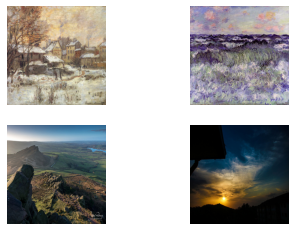

In [ ]:
n_samples = 2
for i in range(n_samples):
    pyplot.subplot(2, n_samples, 1 + i)
    pyplot.axis('off')
    pyplot.imshow(dataA[i].astype('uint8'))
for i in range(n_samples):
    pyplot.subplot(2, n_samples, 1 + n_samples + i)
    pyplot.axis('off')
    pyplot.imshow(dataB[i].astype('uint8'))
pyplot.show()

**CYCLE GAN Architecture**

In [ ]:
def define_discriminator(image_shape):
    init=RandomNormal(stddev=0.02)
    in_image=Input(shape=image_shape)
    d=Conv2D(64,(4,4),strides=(2,2),padding='same',kernel_initializer=init)(in_image)
    d=LeakyReLU(alpha=0.2)(d)
    d=Conv2D(128,(4,4),strides=(2,2),padding='same',kernel_initializer=init)(d)
    d=InstanceNormalization(axis=-1)(d)
    d=LeakyReLU(alpha=0.2)(d)
    d=Conv2D(256,(4,4),strides=(2,2),padding='same',kernel_initializer=init)(d)
    d=InstanceNormalization(axis=-1)(d)
    d=LeakyReLU(alpha=0.2)(d)
    d=Conv2D(512,(4,4),strides=(2,2),padding='same',kernel_initializer=init)(d)
    d=InstanceNormalization(axis=-1)(d)
    d=LeakyReLU(alpha=0.2)(d)
    d = Conv2D(512, (4,4), padding='same', kernel_initializer=init)(d)
    d = InstanceNormalization(axis=-1)(d)
    d = LeakyReLU(alpha=0.2)(d)
    patch_out = Conv2D(1, (4,4), padding='same', kernel_initializer=init)(d)
    model=Model(in_image, patch_out)
    model.compile(loss='mse',optimizer=Adam(lr=0.0002,beta_1=0.5),loss_weights=[0.5])
    return model

In [ ]:
image_shape = (256,256,3)
model = define_discriminator(image_shape)
model.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 128, 128, 64)      3136      
_________________________________________________________________
leaky_re_lu_16 (LeakyReLU)   (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 64, 64, 128)       131200    
_________________________________________________________________
instance_normalization_49 (I (None, 64, 64, 128)       256       
_________________________________________________________________
leaky_re_lu_17 (LeakyReLU)   (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 32, 32, 256)       5245

In [ ]:
def resnet_block(n_filters, input_layer):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# first layer convolutional layer
	g = Conv2D(n_filters, (3,3), padding='same', kernel_initializer=init)(input_layer)
	g = InstanceNormalization(axis=-1)(g)
	g = Activation('relu')(g)
	# second convolutional layer
	g = Conv2D(n_filters, (3,3), padding='same', kernel_initializer=init)(g)
	g = InstanceNormalization(axis=-1)(g)
	# concatenate merge channel-wise with input layer
	g = Concatenate()([g, input_layer])
	return g

In [ ]:
def define_generator(image_shape, n_resnet=6):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# image input
	in_image = Input(shape=image_shape)
	# c7s1-64
	g = Conv2D(64, (7,7), padding='same', kernel_initializer=init)(in_image)
	g = InstanceNormalization(axis=-1)(g)
	g = Activation('relu')(g)
	# d128
	g = Conv2D(128, (3,3), strides=(2,2), padding='same', kernel_initializer=init)(g)
	g = InstanceNormalization(axis=-1)(g)
	g = Activation('relu')(g)
	# d256
	g = Conv2D(256, (3,3), strides=(2,2), padding='same', kernel_initializer=init)(g)
	g = InstanceNormalization(axis=-1)(g)
	g = Activation('relu')(g)
	# R256
	for _ in range(n_resnet):
		g = resnet_block(256, g)
	# u128
	g = Conv2DTranspose(128, (3,3), strides=(2,2), padding='same', kernel_initializer=init)(g)
	g = InstanceNormalization(axis=-1)(g)
	g = Activation('relu')(g)
	# u64
	g = Conv2DTranspose(64, (3,3), strides=(2,2), padding='same', kernel_initializer=init)(g)
	g = InstanceNormalization(axis=-1)(g)
	g = Activation('relu')(g)
	# c7s1-3
	g = Conv2D(3, (7,7), padding='same', kernel_initializer=init)(g)
	g = InstanceNormalization(axis=-1)(g)
	out_image = Activation('tanh')(g)
	# define model
	model = Model(in_image, out_image)
	return model

In [ ]:
def define_composite_model(g_model_1, d_model, g_model_2, image_shape):
	# ensure the model we're updating is trainable
	g_model_1.trainable = True
	# mark discriminator as not trainable
	d_model.trainable = False
	# mark other generator model as not trainable
	g_model_2.trainable = False
	# discriminator element
	input_gen = Input(shape=image_shape)
	gen1_out = g_model_1(input_gen)
	output_d = d_model(gen1_out)
	# identity element
	input_id = Input(shape=image_shape)
	output_id = g_model_1(input_id)
	# forward cycle
	output_f = g_model_2(gen1_out)
	# backward cycle
	gen2_out = g_model_2(input_id)
	output_b = g_model_1(gen2_out)
	# define model graph
	model = Model([input_gen, input_id], [output_d, output_id, output_f, output_b])
	# define optimization algorithm configuration
	opt = Adam(lr=0.0002, beta_1=0.5)
	# compile model with weighting of least squares loss and L1 loss
	model.compile(loss=['mse', 'mae', 'mae', 'mae'], loss_weights=[1, 5, 10, 10], optimizer=opt)
	return model

In [ ]:
#def load_real_samples(filename):
  #load the dataset
  #data = load(filename)

  #unpack arrays
  #A1,A2 = data['arr_0'], data['arr_1']
  #X1, X1_train = train_test_split(A1, test_size = 0.2, random_state = 0)
  #X2, X2_train = train_test_split(A2, test_size = 0.2, random_state = 0)


def load_real_samples(filename):
  #load the dataset
  dataA_path = "dataA.npy"
  dataA_test_path = "dataA_test.npy"
  dataB_path = "dataB.npy"
  dataB_test_path = "dataB_test.npy"

  dataA_new_path = os.path.join(filename, dataA_path)
  dataA_test_new_path = os.path.join(filename, dataA_test_path)
  dataB_new_path = os.path.join(filename, dataB_path)
  dataB_test_new_path = os.path.join(filename, dataB_test_path)

  X1 = load(dataA_new_path)
  X1_test = load(dataA_test_new_path)
  X2 = load(dataB_new_path)
  X2_test = load(dataB_test_new_path)


  #scale down from [0:255] to [-1,1]
  X1 = (X1-127.5)/127.5
  X2 = (X2 - 127.5)/127.5

  return [X1, X2] 

  #scale down from [0:255] to [-1,1]
  X1 = (X1-127.5)/127.5
  X2 = (X2 - 127.5)/127.5

  return [X1, X2]

In [ ]:
def generate_real_samples(dataset, n_samples, patch_shape):
	# choose random instances
	ix = randint(0, dataset.shape[0], n_samples)
	# retrieve selected images
	X = dataset[ix]
	# generate 'real' class labels (1)
	y = ones((n_samples, patch_shape, patch_shape, 1))
	return X, y

In [ ]:
def generate_fake_samples(g_model, dataset, patch_shape):
	# generate fake instance
	X = g_model.predict(dataset)
	# create 'fake' class labels (0)
	y = zeros((len(X), patch_shape, patch_shape, 1))
	return X, y

In [ ]:
def save_models(step, g_model_AtoB, g_model_BtoA):
	# save the first generator model
	#filename1 = 'g_model_AtoB_%06d.h5' % (step+1)
	g_model_AtoB.save('/content/gdrive/My Drive/GAN_Project_2/G_modelAtoB/g_model_AtoB_%06d.h5' % (step+1))
	# save the second generator model
	#filename2 = 'g_model_BtoA_%06d.h5' % (step+1)
	g_model_BtoA.save('/content/gdrive/My Drive/GAN_Project_2/G_modelBtoA/g_model_BtoA_%06d.h5' % (step+1))
	print('>Saved: %s and %s' % ('g_model_AtoB_%06d.h5' % (step+1), 'g_model_BtoA_%06d.h5' % (step+1)))

In [ ]:
def summarize_performance(step, g_model, trainX, name, n_samples=5):
	# select a sample of input images
	X_in, _ = generate_real_samples(trainX, n_samples, 0)
	# generate translated images
	X_out, _ = generate_fake_samples(g_model, X_in, 0)
	# scale all pixels from [-1,1] to [0,1]
	X_in = (X_in + 1) / 2.0
	X_out = (X_out + 1) / 2.0
	# plot real images
	for i in range(n_samples):
		pyplot.subplot(2, n_samples, 1 + i)
		pyplot.axis('off')
		pyplot.imshow(X_in[i])
	# plot translated image
	for i in range(n_samples):
		pyplot.subplot(2, n_samples, 1 + n_samples + i)
		pyplot.axis('off')
		pyplot.imshow(X_out[i])
	# save plot to file
	#filename1 = '%s_generated_plot_%06d.png' % (name, (step+1))
	pyplot.savefig('/content/gdrive/My Drive/GAN_Project_2/Generated_Images/%s_generated_plot_%06d.png' % (name, (step+1)))
	pyplot.close()

In [ ]:
def update_image_pool(pool, images, max_size=50):
	selected = list()
	for image in images:
		if len(pool) < max_size:
			# stock the pool
			pool.append(image)
			selected.append(image)
		elif random() < 0.5:
			# use image, but don't add it to the pool
			selected.append(image)
		else:
			# replace an existing image and use replaced image
			ix = randint(0, len(pool))
			selected.append(pool[ix])
			pool[ix] = image
	return asarray(selected)

In [ ]:
def train(d_model_A, d_model_B, g_model_AtoB, g_model_BtoA, c_model_AtoB, c_model_BtoA, dataset):
	# define properties of the training run
	n_epochs, n_batch, = 100, 1
	# determine the output square shape of the discriminator
	n_patch = d_model_A.output_shape[1]
	# unpack dataset
	trainA, trainB = dataset
	# prepare image pool for fakes
	poolA, poolB = list(), list()
	# calculate the number of batches per training epoch
	bat_per_epo = int(len(trainA) / n_batch)
	# calculate the number of training iterations
	n_steps = bat_per_epo * n_epochs
	# manually enumerate epochs
	for i in range(n_steps):
		# select a batch of real samples
		X_realA, y_realA = generate_real_samples(trainA, n_batch, n_patch)
		X_realB, y_realB = generate_real_samples(trainB, n_batch, n_patch)
		# generate a batch of fake samples
		X_fakeA, y_fakeA = generate_fake_samples(g_model_BtoA, X_realB, n_patch)
		X_fakeB, y_fakeB = generate_fake_samples(g_model_AtoB, X_realA, n_patch)
		# update fakes from pool
		X_fakeA = update_image_pool(poolA, X_fakeA)
		X_fakeB = update_image_pool(poolB, X_fakeB)
		# update generator B->A via adversarial and cycle loss
		g_loss2, _, _, _, _  = c_model_BtoA.train_on_batch([X_realB, X_realA], [y_realA, X_realA, X_realB, X_realA])
		# update discriminator for A -> [real/fake]
		dA_loss1 = d_model_A.train_on_batch(X_realA, y_realA)
		dA_loss2 = d_model_A.train_on_batch(X_fakeA, y_fakeA)
		# update generator A->B via adversarial and cycle loss
		g_loss1, _, _, _, _ = c_model_AtoB.train_on_batch([X_realA, X_realB], [y_realB, X_realB, X_realA, X_realB])
		# update discriminator for B -> [real/fake]
		dB_loss1 = d_model_B.train_on_batch(X_realB, y_realB)
		dB_loss2 = d_model_B.train_on_batch(X_fakeB, y_fakeB)
		# summarize performance
		print('>%d, dA[%.3f,%.3f] dB[%.3f,%.3f] g[%.3f,%.3f]' % (i+1, dA_loss1,dA_loss2, dB_loss1,dB_loss2, g_loss1,g_loss2))
		# evaluate the model performance every so often
		if (i+1) % (bat_per_epo * 1) == 0:
			# plot A->B translation
			summarize_performance(i, g_model_AtoB, trainA, 'AtoB')
			# plot B->A translation
			summarize_performance(i, g_model_BtoA, trainB, 'BtoA')
		if (i+1) % (bat_per_epo * 5) == 0:
			# save the models
			save_models(i, g_model_AtoB, g_model_BtoA)

In [ ]:
dataset = load_real_samples("/content/gdrive/My Drive/GAN_Project_2")
print('Loaded', dataset[0].shape, dataset[1].shape)
# define input shape based on the loaded dataset
image_shape = dataset[0].shape[1:]
# generator: A -> B
g_model_AtoB = define_generator(image_shape)
#g_model_AtoB = model_AtoB
# generator: B -> A
g_model_BtoA = define_generator(image_shape)
#g_model_BtoA = model_BtoA
# discriminator: A -> [real/fake]
d_model_A = define_discriminator(image_shape)
# discriminator: B -> [real/fake]
d_model_B = define_discriminator(image_shape)
# composite: A -> B -> [real/fake, A]
c_model_AtoB = define_composite_model(g_model_AtoB, d_model_B, g_model_BtoA, image_shape)
# composite: B -> A -> [real/fake, B]
c_model_BtoA = define_composite_model(g_model_BtoA, d_model_A, g_model_AtoB, image_shape)
# train models
train(d_model_A, d_model_B, g_model_AtoB, g_model_BtoA, c_model_AtoB, c_model_BtoA, dataset)

Loaded (1072, 256, 256, 3) (1414, 256, 256, 3)


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Streaming output truncated to the last 5000 lines.
>18587, dA[0.002,0.003] dB[0.016,0.013] g[5.495,5.644]
>18588, dA[0.005,0.014] dB[0.087,0.040] g[4.172,4.474]
>18589, dA[0.003,0.003] dB[0.004,0.012] g[4.369,4.709]
>18590, dA[0.001,0.003] dB[0.009,0.047] g[3.838,4.353]
>18591, dA[0.002,0.002] dB[0.009,0.020] g[5.911,6.566]
>18592, dA[0.004,0.005] dB[0.007,0.024] g[7.146,6.667]
>18593, dA[0.002,0.040] dB[0.098,0.015] g[3.999,4.433]
>18594, dA[0.006,0.011] dB[0.083,0.004] g[4.508,5.434]
>18595, dA[0.070,0.007] dB[0.015,0.120] g[4.058,4.525]
>18596, dA[0.003,0.007] dB[0.004,0.006] g[3.164,3.737]
>18597, dA[0.001,0.004] dB[0.008,0.217] g[4.517,5.730]
>18598, dA[0.060,0.025] dB[0.367,0.010] g[4.888,4.057]
>18599, dA[0.001,0.006] dB[0.018,0.006] g[6.930,6.297]
>18600, dA[0.002,0.002] dB[0.017,0.005] g[3.022,4.019]
>18601, dA[0.004,0.002] dB[0.007,0.010] g[4.308,4.273]
>18602, dA[0.003,0.069] dB[0.005,0.026] g[3.962,4.231]
>18603, dA[0.004,0.006] dB[0.017,0.013] g[3.711,4.168]
>18604, dA[0.0

In [ ]:
#######       Once the model is run above, then below codes are run    ########

In [ ]:
import os

filename = "/content/gdrive/My Drive/Monet256"


dataA_path = "dataA.npy"
dataA_test_path = "dataA_test.npy"
dataB_path = "dataB.npy"
dataB_test_path = "dataB_test.npy"

dataA_new_path = os.path.join(filename, dataA_path)
dataA_test_new_path = os.path.join(filename, dataA_test_path)
dataB_new_path = os.path.join(filename, dataB_path)
dataB_test_new_path = os.path.join(filename, dataB_test_path)

dataA = load(dataA_new_path)
dataA_test = load(dataA_test_new_path)
dataB = load(dataB_new_path)
dataB_test = load(dataB_test_new_path)

print(dataA.shape)
print(dataA_test.shape)
print(dataB.shape)
print(dataB_test.shape)

(1072, 256, 256, 3)
(121, 256, 256, 3)
(1414, 256, 256, 3)
(173, 256, 256, 3)


In [ ]:
A_data, B_data = dataA_test, dataB_test
print('Loaded', A_data.shape, B_data.shape)

Loaded (121, 256, 256, 3) (173, 256, 256, 3)


In [ ]:
from keras.models import load_model
from numpy import load
from numpy import vstack
from matplotlib import pyplot
from numpy.random import randint
from keras_contrib.layers.normalization.instancenormalization import InstanceNormalization
 

In [ ]:
cust = {'InstanceNormalization': InstanceNormalization}
model_AtoB = load_model('/content/gdrive/My Drive/Monet256/G_model_A_to_B/g_model_AtoB_021440.h5', cust,compile=False)
model_BtoA = load_model('/content/gdrive/My Drive/Monet256/G_model_B_to_A/g_model_BtoA_021440.h5', cust,compile=False)

In [ ]:
model_AtoB.summary()

Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv2d_57 (Conv2D)              (None, 256, 256, 64) 9472        input_11[0][0]                   
__________________________________________________________________________________________________
instance_normalization_53 (Inst (None, 256, 256, 64) 128         conv2d_57[0][0]                  
__________________________________________________________________________________________________
activation_25 (Activation)      (None, 256, 256, 64) 0           instance_normalization_53[0][0]  
____________________________________________________________________________________________

In [ ]:
# select a random sample of images from the dataset
def select_sample(dataset, n_samples):
	# choose random instances
	ix = randint(0, dataset.shape[0], n_samples)
	# retrieve selected images
	X = dataset[ix]
	return X

In [ ]:
def show_plot(imagesX, imagesY1, imagesY2):
	images = vstack((imagesX, imagesY1, imagesY2))
	titles = ['Real', 'Generated', 'Reconstructed']
	# scale from [-1,1] to [0,1]
	images = (images + 1) / 2.0
	# plot images row by row
	for i in range(len(images)):
		# define subplot
		pyplot.subplot(1, len(images), 1 + i)
		# turn off axis
		pyplot.axis('off')
		# plot raw pixel data
		pyplot.imshow(images[i])
		# title
		pyplot.title(titles[i])
	pyplot.show()
 

In [ ]:
A_data=(A_data - 127.5) / 127.5
B_data=(B_data - 127.5) / 127.5
print('Loaded', A_data.shape, B_data.shape)

Loaded (121, 256, 256, 3) (173, 256, 256, 3)


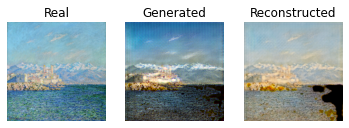

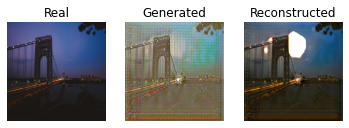

In [ ]:
cust = {'InstanceNormalization': InstanceNormalization}
model_AtoB = load_model('/content/gdrive/My Drive/Monet256/G_model_A_to_B/g_model_AtoB_021440.h5', cust,compile=False)
model_BtoA = load_model('/content/gdrive/My Drive/Monet256/G_model_B_to_A/g_model_BtoA_021440.h5', cust,compile=False)
A_real = select_sample(A_data, 1)
B_generated  = model_AtoB.predict(A_real)
A_reconstructed = model_BtoA.predict(B_generated)
show_plot(A_real, B_generated, A_reconstructed)
# plot B->A->B
B_real = select_sample(B_data, 1)
A_generated  = model_BtoA.predict(B_real)
B_reconstructed = model_AtoB.predict(A_generated)
show_plot(B_real, A_generated, B_reconstructed)